Predicción de la resistencia del concreto
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/R-for-predictive-analytics/tree/master/) para acceder al repositorio online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/R-for-predictive-analytics/tree/master/) para explorar el repositorio usando `nbviewer`. 

---

# Definición del problema real

El concreto es uno de los materiales más usados en construcción. Es fabricado por la mezcla de varios elementos, la cual, al secarse, forma una masa dura muy resistente a la compresión. Uno de los principales problemas es que la mezcla puede demorarse varios meses en secar, y resulta particularmente importante el poder realizar pronósticos de la resistencia que alcanzará, tanto para fines de control como para verificar las restricciones de diseño.  

# Definición del problema en términos de los datos

La muestra contiene 1030 mediciones de concretos con ocho características que decriben los componentes usados en la mezcla. Se piensa que estas ocho características tienen una relación no lineal con la resistencia a la compresión final que tiene el concreto. El problema consiste en construir un modelo de regresión no lineal que permita pronósticar la resistencia del concreto con base en ellas. 

* Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable 


* Bla st Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable 


* Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable 
  
  
* Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable 
  
  
* Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable 


* Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable 


* Fine Aggregate (component 7)	-- quantitative -- kg in a m3 mixture -- Input Variable 


* Age -- quantitative -- Day (1~365) -- Input Variable 


* Concrete compressive strength -- quantitative -- MPa -- Output Variable 

# Exploración

In [1]:
## Carga de los datos
concrete <- read.csv("data/concrete.csv")
str(concrete)
## Todas las variables son numéricas

'data.frame':	1030 obs. of  9 variables:
 $ cement      : num  540 540 332 332 199 ...
 $ slag        : num  0 0 142 142 132 ...
 $ ash         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ water       : num  162 162 228 228 192 228 228 228 228 228 ...
 $ superplastic: num  2.5 2.5 0 0 0 0 0 0 0 0 ...
 $ coarseagg   : num  1040 1055 932 932 978 ...
 $ fineagg     : num  676 676 594 594 826 ...
 $ age         : int  28 28 270 365 360 90 365 28 28 28 ...
 $ strength    : num  80 61.9 40.3 41 44.3 ...


In [2]:
##
## Información relevante de la resistencia
##
summary(concrete$strength)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.33   23.71   34.45   35.82   46.13   82.60 

In [3]:
## Se escalan todas las variables al rango [0, 1]
## para evitar problemas asociados a la escala
normalize <- function(x) {
    return((x - min(x)) / (max(x) - min(x)))
}

concrete_norm <- as.data.frame(lapply(concrete, normalize))

In [4]:
## Se revisan algunas variables del data.frame
summary(concrete_norm$strength)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2664  0.4001  0.4172  0.5457  1.0000 

In [5]:
summary(concrete_norm$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01648 0.07418 0.12270 0.15110 1.00000 

# Metodología


Haga click [aquí](https://github.com/jdvelasq/statistics-for-analytics/tree/master/) para acceder al repositorio online con la descripción de la metodología.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/statistics-for-analytics/tree/master/) para explorar el repositorio de la metodología usando `nbviewer`. 

# Entrenamiento del modelo

In [6]:
##
## Se usa el 75% de los datos para entrenamiento
##
concrete_train <- concrete_norm[1:773, ]
concrete_test <- concrete_norm[774:1030, ]

In [8]:
## install.packages("neuralnet")
library(neuralnet)

In [9]:
##
## El modelo se especifica tal como en los 
## modelos de regresión lineal
##
concrete_model <- neuralnet(strength ~ cement + slag
                            + ash + water + superplastic + 
                            coarseagg + fineagg + age, 
                            data = concrete_train)
## por defecto, el modelo tiene una neurona en la capa oculta

In [10]:
##
## esta función no realiza la gráfica en jupyter!
##
options(repr.plot.width=10, repr.plot.height=6)
plot(concrete_model) 

# Evaluación del modelo

In [11]:
##
## Se analiza el entrenamiento
## variable de salida
##
summary(concrete_train$strength)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.2639841 0.4163448 0.4303287 0.5839043 1.0000000 

In [12]:
##
## pronóstico del modelo para la muestra de 
## entrenamiento
##
summary(unlist(concrete_model$net.result))

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
0.08057346 0.25981666 0.46151320 0.43032675 0.60489164 0.67405956 

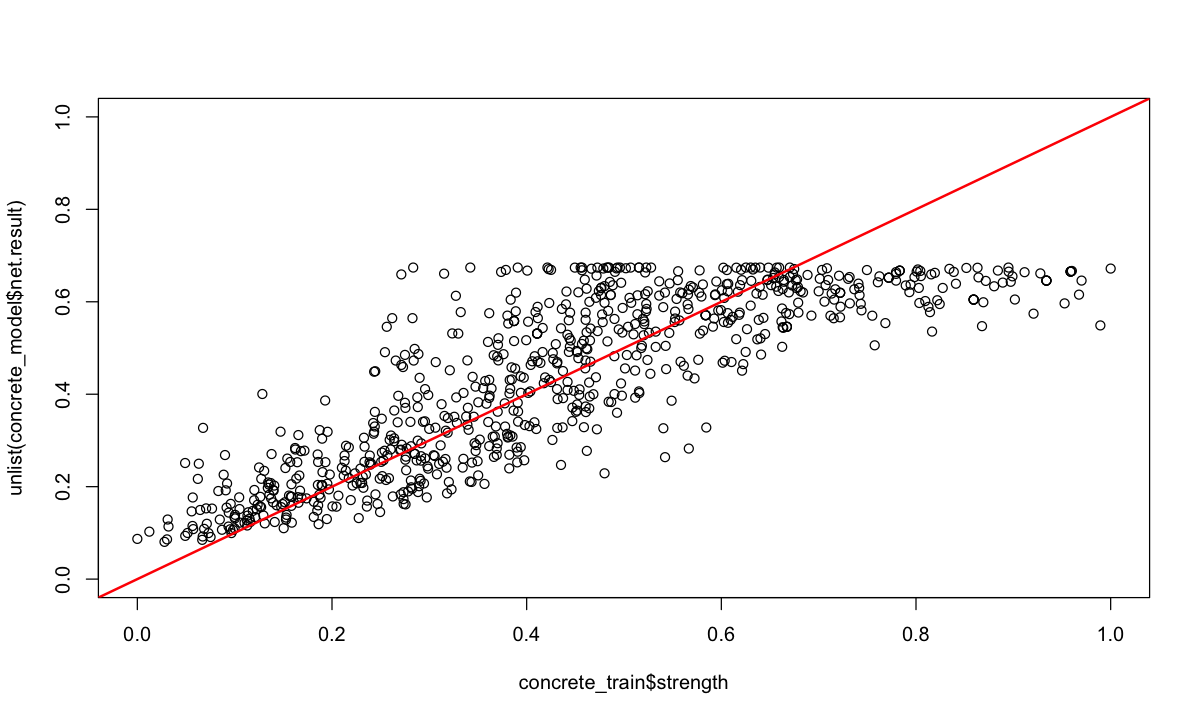

In [13]:
##
## si el pronóstico es perfecto, los puntos
## deben estar sobre la linea a 45 grados.
##
plot(concrete_train$strength, 
     unlist(concrete_model$net.result),
     xlim=c(0,1),
     ylim=c(0,1))
abline(a=0,b=1, col='red', lwd=2)

In [14]:
##
## evaluación de la muestra de prueba
##
model_results <- compute(concrete_model, concrete_test[1:8])
predicted_strength <- model_results$net.result
cor(predicted_strength, concrete_test$strength)

0.7157878273


In [15]:
##
## se define el error medio absoluto
##
MAE <- function(actual, predicted) {
    mean(abs(actual - predicted))
}

In [16]:
MAE(predicted_strength, concrete_test$strength)

[1] 0.08680191636

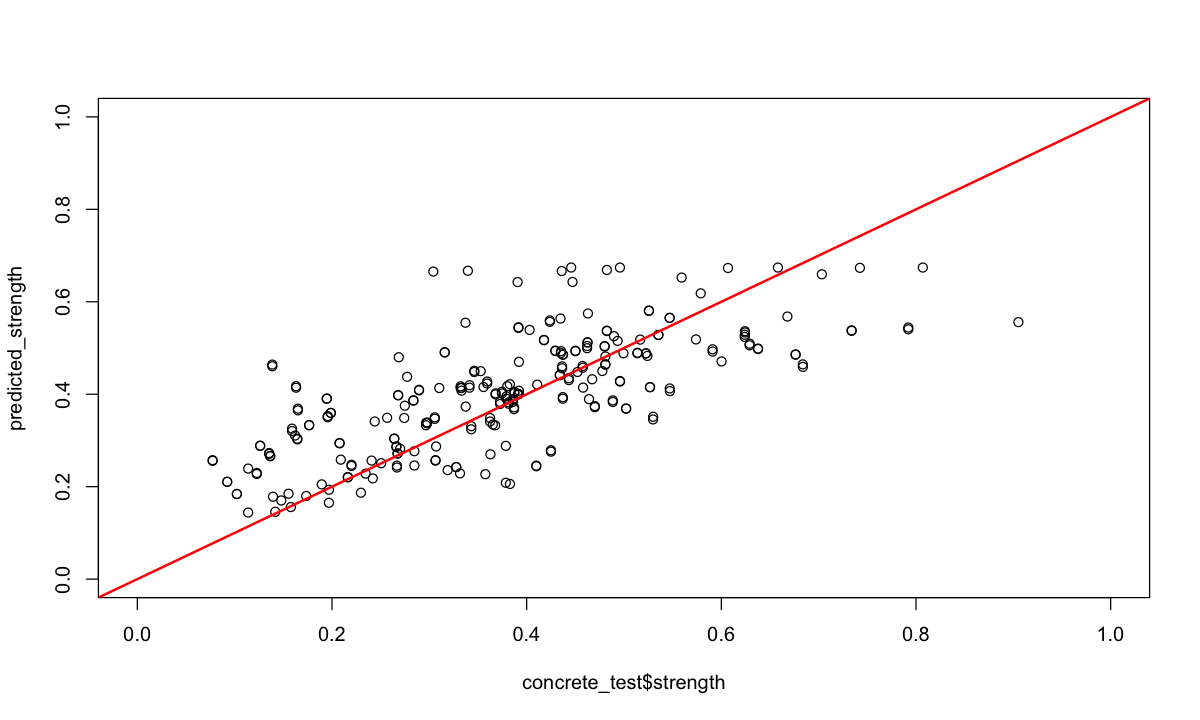

In [17]:
##
## si el pronóstico es perfecto, los puntos
## deben estar sobre la linea a 45 grados.
##
plot(concrete_test$strength, 
     predicted_strength,
     xlim=c(0,1),
     ylim=c(0,1))
abline(a=0,b=1, col='red', lwd=2)

# Mejora del modelo

In [18]:
concrete_model2 <- neuralnet(strength ~ cement + slag +
                               ash + water + superplastic +
                               coarseagg + fineagg + age,
                               data = concrete_train, 
                             hidden = 5) # cantidad de neuronas en la capa oculta

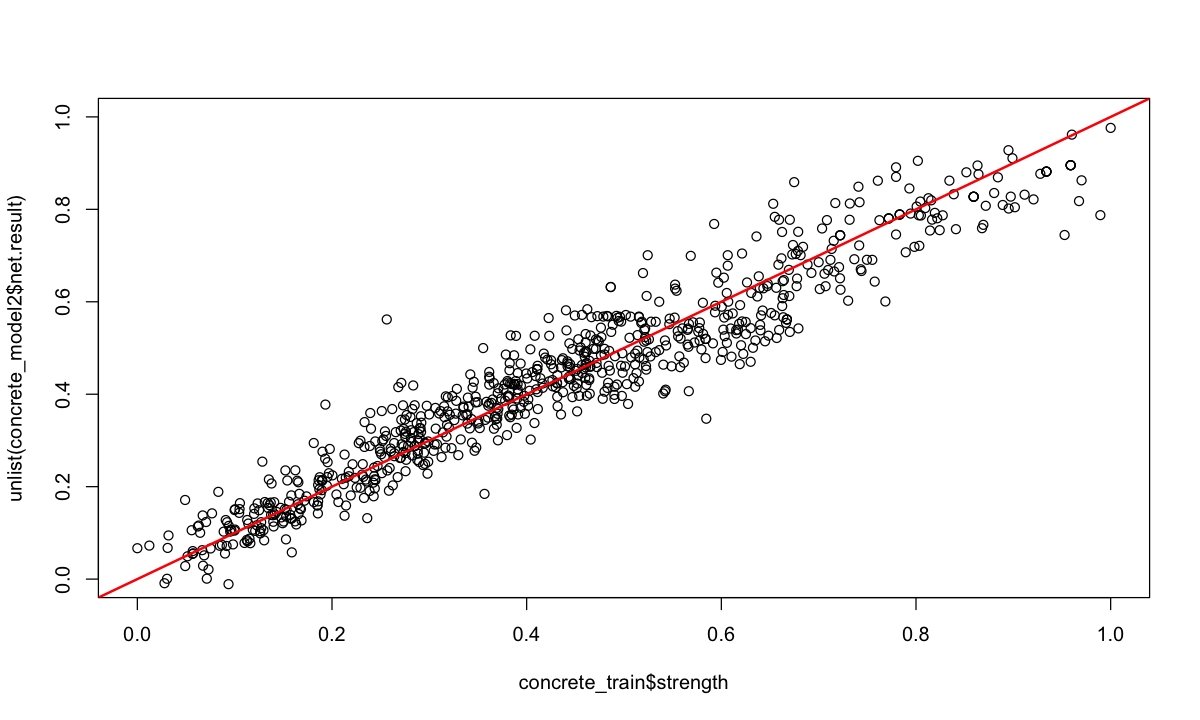

In [19]:
##
## si el pronóstico es perfecto, los puntos
## deben estar sobre la linea a 45 grados.
## Note que el pronóstico es mucho mejor
## que en el caso anterior.
##
plot(concrete_train$strength, 
     unlist(concrete_model2$net.result),
     xlim=c(0,1),
     ylim=c(0,1))
abline(a=0,b=1, col='red', lwd=2)

In [20]:
##
## no genera la gráfica en jupyter!
##
plot(concrete_model2)

In [21]:
model_results2 <- compute(concrete_model2, concrete_test[1:8])
predicted_strength2 <- model_results2$net.result
cor(predicted_strength2, concrete_test$strength)

0.720272454


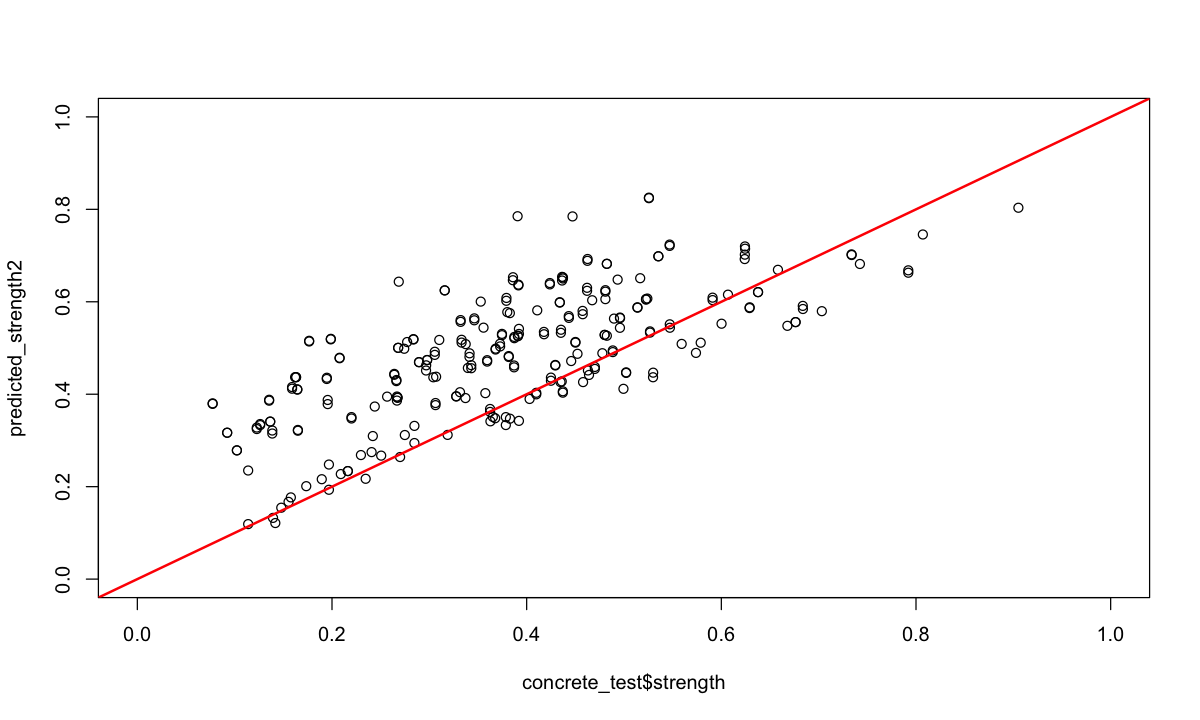

In [22]:
##
## compare esta gráfica con la original
##
plot(concrete_test$strength, 
     predicted_strength2,
     xlim=c(0,1),
     ylim=c(0,1))
abline(a=0,b=1, col='red', lwd=2)

**Ejercicio.--** Realice la estimación de este modelo usando cross-validation.

---

Predicción de la resistencia del concreto
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/R-for-predictive-analytics/tree/master/) para acceder al repositorio online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/R-for-predictive-analytics/tree/master/) para explorar el repositorio usando `nbviewer`. 